# Logistic Regression

## Data Preprocessing

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

dataset = pd.read_csv('../datasets/02-regression/Social_Network_Ads.csv')
dataset.head()


,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [46]:
dataset.tail()

,Age,EstimatedSalary,Purchased
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0
399,49,36000,1


In [32]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [33]:
X.shape

(400, 2)

### Splitting Dataset into train and test

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


### Feature Scalling (Optional in Logistic regression)
Applied to improve performance

In [35]:
X_train.shape

(300, 2)

In [36]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [37]:
# SHowing First 10 data of train
print(X_train[:10,:])

[[ 0.58164944 -0.88670699]
 [-0.60673761  1.46173768]
 [-0.01254409 -0.5677824 ]
 [-0.60673761  1.89663484]
 [ 1.37390747 -1.40858358]
 [ 1.47293972  0.99784738]
 [ 0.08648817 -0.79972756]
 [-0.01254409 -0.24885782]
 [-0.21060859 -0.5677824 ]
 [-0.21060859 -0.19087153]]


In [38]:
# SHowing First 10 data of test
print(X_test[:10,:])

[[-0.80480212  0.50496393]
 [-0.01254409 -0.5677824 ]
 [-0.30964085  0.1570462 ]
 [-0.80480212  0.27301877]
 [-0.30964085 -0.5677824 ]
 [-1.10189888 -1.43757673]
 [-0.70576986 -1.58254245]
 [-0.21060859  2.15757314]
 [-1.99318916 -0.04590581]
 [ 0.8787462  -0.77073441]]


In [39]:
print(y_train[:10])


[0 1 0 1 1 1 0 0 0 0]


In [40]:
print(y_test[:10])

[0 0 0 0 0 0 0 1 0 0]


## Training Logistic Regression Model

In [41]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

### Predicting results

In [49]:
age = 30
salary = 87000

x_predict = [[age,salary]]

In [55]:
y_pred = classifier.predict(sc.transform(x_predict))
print(f"For Age:{age} yrs & salary:${salary}\nPredicted Purchase: {bool(y_pred[0])}")


For Age:30 yrs & salary:$87000
Predicted Purchase: False


### Predicting all test values

In [72]:
i = 0
purchased_arr = []
for isPurchased in y_pred:
    x = sc.inverse_transform(X_test[i, :].reshape(1, -1))[0]
    age = int(x[0])
    salary = int(x[1])
    print(
        f"For Age:{age} & Sal: ${salary}, Purchased:{bool(isPurchased)}\n")
    purchased_arr.append(isPurchased)
    i+=1


For Age:30 & Sal: $87000, Purchased:False

For Age:38 & Sal: $50000, Purchased:False

For Age:35 & Sal: $75000, Purchased:False

For Age:30 & Sal: $79000, Purchased:False

For Age:35 & Sal: $50000, Purchased:False

For Age:27 & Sal: $20000, Purchased:False

For Age:31 & Sal: $15000, Purchased:False

For Age:36 & Sal: $144000, Purchased:True

For Age:18 & Sal: $68000, Purchased:False

For Age:47 & Sal: $43000, Purchased:True

For Age:30 & Sal: $49000, Purchased:False

For Age:28 & Sal: $55000, Purchased:False

For Age:37 & Sal: $55000, Purchased:False

For Age:39 & Sal: $77000, Purchased:False

For Age:20 & Sal: $86000, Purchased:False

For Age:32 & Sal: $117000, Purchased:False

For Age:37 & Sal: $77000, Purchased:False

For Age:19 & Sal: $85000, Purchased:False

For Age:55 & Sal: $130000, Purchased:True

For Age:35 & Sal: $22000, Purchased:False

For Age:35 & Sal: $47000, Purchased:False

For Age:47 & Sal: $144000, Purchased:True

For Age:41 & Sal: $51000, Purchased:False

For Age:47 

### Creating Confusion Matrix

In [75]:
print(y_test)
print(y_pred)


[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1]
[0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1]


In [88]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[65  3]
 [ 8 24]]


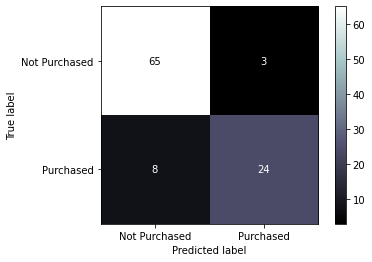

In [100]:
from cProfile import label


disp = ConfusionMatrixDisplay(
                                confusion_matrix=cm,
                                display_labels=["Not Purchased","Purchased"]
                                )
disp.plot(cmap='bone')
plt.show()